In [1]:
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
from collections import Counter
from scipy.signal import find_peaks

In [12]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

In [5]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,158.700313,23.453699,71.950184,41.881901,26.452318,11.047131,44.099359,32.289559,35.088986,68.905183,...,30.323867,39.633213,15.273621,62.063384,36.709497,120.551176,23.179887,22.873782,77.699142,46.556570
1,158.640037,23.425170,71.915288,41.858587,26.419103,11.022817,44.122664,32.258483,35.045804,68.876884,...,30.286651,39.617226,15.246616,62.023428,36.673243,120.504543,23.152669,22.847299,77.662203,46.532400
2,158.459238,23.339597,71.810614,41.788653,26.319475,10.949886,44.192567,32.165269,34.916287,68.791997,...,30.175019,39.569268,15.165614,61.903579,36.564501,120.364663,23.071029,22.767861,77.551407,46.459897
3,158.158008,23.197017,71.636207,41.672126,26.153484,10.828371,44.309036,32.009958,34.700512,68.650555,...,29.989024,39.489352,15.030651,61.703902,36.383333,120.131606,22.935006,22.635501,77.366811,46.339087
4,157.736499,22.997497,71.392140,41.509050,25.921215,10.658322,44.472015,31.792620,34.398613,68.452611,...,29.728750,39.377495,14.841788,61.424503,36.129841,119.805483,22.744663,22.450279,77.108512,46.170013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17.310329,3.131684,1.627084,1.268836,6.549238,0.638636,5.765008,8.441597,13.180741,0.440554,...,2.535038,7.959169,0.784373,1.926625,3.712288,2.097589,10.944315,2.326322,0.094115,4.287337
996,17.359571,3.161219,1.696287,1.293176,6.484021,0.574354,5.846652,8.470322,12.958096,0.420413,...,2.529914,7.882230,0.806052,1.846028,3.648188,2.114517,10.943840,2.339834,0.095271,4.316069
997,17.403357,3.190445,1.765104,1.317745,6.417372,0.510177,5.926353,8.496613,12.733305,0.400530,...,2.528256,7.804138,0.827463,1.768341,3.585205,2.130676,10.938560,2.355930,0.096396,4.342577
998,17.441690,3.219298,1.833502,1.342507,6.349330,0.446154,6.004078,8.520465,12.506490,0.381014,...,2.529921,7.724918,0.848597,1.693578,3.523357,2.146066,10.928482,2.374578,0.097494,4.366867


In [6]:
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-4.006749,-4.188136,-3.638160,-3.894873,-3.844019,-3.809503,-3.165183,-3.245228,-4.062528,-3.633562,...,-3.877194,-2.436400,-4.331613,-4.054178,-5.556947,-4.426408,-3.773735,-4.070915,-4.221646,-3.532301
1,-3.966481,-4.146044,-3.601596,-3.855728,-3.805385,-3.771216,-3.133372,-3.212612,-4.021698,-3.597043,...,-3.838227,-2.411913,-4.288079,-4.013432,-5.501099,-4.381922,-3.735808,-4.030001,-4.179217,-3.496800
2,-3.926212,-4.103952,-3.565031,-3.816584,-3.766752,-3.732930,-3.101561,-3.179997,-3.980869,-3.560525,...,-3.799260,-2.387427,-4.244546,-3.972687,-5.445250,-4.337435,-3.697881,-3.989087,-4.136789,-3.461300
3,-3.885943,-4.061860,-3.528467,-3.777440,-3.728119,-3.694643,-3.069750,-3.147382,-3.940039,-3.524007,...,-3.760293,-2.362941,-4.201012,-3.931941,-5.389401,-4.292949,-3.659954,-3.948174,-4.094360,-3.425799
4,-3.845674,-4.019768,-3.491902,-3.738295,-3.689485,-3.656357,-3.037939,-3.114766,-3.899210,-3.487489,...,-3.721327,-2.338454,-4.157478,-3.891196,-5.333552,-4.248462,-3.622027,-3.907260,-4.051931,-3.390299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.845674,4.019768,3.491902,3.738295,3.689485,3.656357,3.037939,3.114766,3.899210,3.487489,...,3.721327,2.338454,4.157478,3.891196,5.333552,4.248462,3.622027,3.907260,4.051931,3.390299
196,3.885943,4.061860,3.528467,3.777440,3.728119,3.694643,3.069750,3.147382,3.940039,3.524007,...,3.760293,2.362941,4.201012,3.931941,5.389401,4.292949,3.659954,3.948174,4.094360,3.425799
197,3.926212,4.103952,3.565031,3.816584,3.766752,3.732930,3.101561,3.179997,3.980869,3.560525,...,3.799260,2.387427,4.244546,3.972687,5.445250,4.337435,3.697881,3.989087,4.136789,3.461300
198,3.966481,4.146044,3.601596,3.855728,3.805385,3.771216,3.133372,3.212612,4.021698,3.597043,...,3.838227,2.411913,4.288079,4.013432,5.501099,4.381922,3.735808,4.030001,4.179217,3.496800


In [13]:
names = []
for index in FF_df.columns:
    names.append(str(index) + 'i')
    names.append(str(index) + 'v')

FF_peak_df = pd.DataFrame(index=range(23), columns=names)
TD_peak_df = pd.DataFrame(index=range(41), columns=names)

FF_largest_amount = 0
TD_largest_amount = 0

for index in FF_df.columns:
    max_peaks_FF, _ = find_peaks(FF_df[index])
    min_peaks_FF, _ = find_peaks(-FF_df[index])
    
    FF_peak_index = np.hstack((max_peaks_FF, min_peaks_FF))
    FF_peak_index.sort()
    FF_peak_value = FF_df[index][FF_peak_index]
    
    if FF_largest_amount < len(FF_peak_index):
        FF_largest_amount = len(FF_peak_index)
    
    FF_peak_df[str(index) + 'i'] = pd.Series(FF_peak_index)
    FF_peak_df[str(index) + 'v'] = pd.Series(list(FF_peak_value))
    
    max_peaks_TD, _ = find_peaks(TD_y_df[index])
    min_peaks_TD, _ = find_peaks(-TD_y_df[index])
    
    TD_peak_index = np.hstack((max_peaks_TD, min_peaks_TD))
    TD_peak_index.sort()
    TD_peak_value = TD_y_df[index][TD_peak_index]
    
    if TD_largest_amount < len(TD_peak_index):
        TD_largest_amount = len(TD_peak_index)
    
    TD_peak_df[str(index) + 'i'] = pd.Series(TD_peak_index)
    TD_peak_df[str(index) + 'v'] = pd.Series(list(TD_peak_value))
    
print(FF_largest_amount)
print(TD_largest_amount)

C:\Users\niila\AppData\Local\Temp\ipykernel_4496\3622603169.py:37: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  TD_peak_df[str(index) + 'v'] = pd.Series(list(TD_peak_value))


23
41


In [8]:
FF_peak_df.isna().sum(axis=0).value_counts()

10    424
11    396
12    202
9      76
13     68
15     26
14     22
16      4
8       4
0       2
5       2
dtype: int64

In [7]:
FF_peak_df

,0i,0v,1i,1v,2i,2v,3i,3v,4i,4v,...,608i,608v,609i,609v,610i,610v,611i,611v,612i,612v
0,55.0,1.642677,29.0,0.230294,47.0,0.634862,44.0,0.617265,29.0,0.505949,...,54.0,0.372514,30.0,0.473393,30.0,0.293642,48.0,0.765778,45.0,0.526478
1,143.0,331.330438,149.0,231.824996,155.0,265.186571,162.0,206.696496,140.0,237.803138,...,147.0,279.206894,144.0,207.517433,151.0,222.518145,143.0,217.776912,170.0,232.662970
2,237.0,1.892465,260.0,0.560469,262.0,1.491681,278.0,1.383059,245.0,0.582451,...,248.0,1.053632,247.0,2.223680,262.0,3.511012,252.0,1.276767,296.0,0.752603
3,300.0,150.251758,328.0,91.700922,331.0,113.449338,347.0,79.833498,301.0,76.967218,...,310.0,109.945567,313.0,94.706592,330.0,88.081391,309.0,57.761874,368.0,80.615339
4,377.0,1.226568,414.0,1.599710,417.0,0.516610,437.0,2.226908,366.0,0.852871,...,388.0,1.484522,390.0,6.102914,413.0,6.194779,393.0,2.400687,460.0,0.545327
5,449.0,109.910837,497.0,67.440547,494.0,74.661154,515.0,46.521243,445.0,83.615978,...,461.0,75.948629,467.0,80.839946,493.0,64.524031,465.0,28.881169,544.0,53.867489
6,556.0,0.825910,623.0,0.096372,616.0,0.313041,653.0,0.206025,555.0,0.101388,...,572.0,1.208470,570.0,4.795210,618.0,1.954699,617.0,0.197200,690.0,0.034209
7,597.0,16.951412,678.0,11.282299,660.0,8.976489,689.0,2.730664,597.0,12.843224,...,618.0,12.319759,618.0,19.371972,660.0,7.392035,653.0,1.181773,713.0,1.678701
8,648.0,0.506061,759.0,0.277671,720.0,0.093960,734.0,1.647486,653.0,0.155234,...,682.0,0.403518,680.0,3.915188,713.0,2.637676,709.0,0.262701,739.0,0.173133
9,719.0,22.313741,849.0,8.503053,785.0,7.255117,791.0,2.777661,720.0,13.395769,...,747.0,8.845803,746.0,17.987158,784.0,8.810435,762.0,0.761384,840.0,11.766618


In [14]:
import collections

n_nans = FF_peak_df.isna().sum(axis=0)
FF_peak_amounts = FF_peak_df.isna().sum(axis=0).value_counts().values
i = 0 
wanted_amount = round(613*0.9,1)
amount = 0
sample_nans = []
for nan_amount in FF_peak_df.isna().sum(axis=0).value_counts().index:
    if amount < wanted_amount:
        sample_nans.append(nan_amount)
        amount = amount + FF_peak_amounts[i]/2
    i = i + 1
    
common_peak_filtered_FF = pd.DataFrame()

common_peak_FF_columns = set()
n_nans = FF_peak_df.isna().sum(axis=0)
highest_nans = 0
for nans in sample_nans:
    col_names = n_nans[n_nans == nans].index
    FF_peak_filtered = FF_peak_df[col_names]
    
    for column in FF_peak_filtered.columns:
        common_peak_FF_columns.add(column[:-1])
        common_peak_filtered_FF[column] = FF_peak_filtered[column]

common_peak_FF_columns = list(common_peak_FF_columns)

C:\Users\niila\AppData\Local\Temp\ipykernel_4496\3435861859.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_peak_filtered_FF[column] = FF_peak_filtered[column]
C:\Users\niila\AppData\Local\Temp\ipykernel_4496\3435861859.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_peak_filtered_FF[column] = FF_peak_filtered[column]
C:\Users\niila\AppData\Local\Temp\ipykernel_4496\3435861859.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

C:\Users\niila\AppData\Local\Temp\ipykernel_4496\3435861859.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_peak_filtered_FF[column] = FF_peak_filtered[column]
C:\Users\niila\AppData\Local\Temp\ipykernel_4496\3435861859.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  common_peak_filtered_FF[column] = FF_peak_filtered[column]
C:\Users\niila\AppData\Local\Temp\ipykernel_4496\3435861859.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

In [5]:
sample_nans.sort()
common_peak_filtered_FF = common_peak_filtered_FF.iloc[:23-sample_nans[0]]
n_nans = common_peak_filtered_FF.isna().sum(axis=0).value_counts()
print(n_nans)
common_peak_filtered_FF

1    424
2    396
3    202
0     76
4     68
dtype: int64


,0i,0v,2i,2v,3i,3v,7i,7v,11i,11v,...,569i,569v,570i,570v,576i,576v,582i,582v,606i,606v
0,55.0,1.642677,47.0,0.634862,44.0,0.617265,33.0,0.209643,53.0,0.882934,...,53.0,1.536588,35.0,0.495930,45.0,0.448006,29.0,0.160209,41.0,0.272902
1,143.0,331.330438,155.0,265.186571,162.0,206.696496,150.0,248.577364,153.0,255.872025,...,149.0,209.367737,148.0,218.090976,169.0,224.902839,145.0,240.549365,139.0,244.341741
2,237.0,1.892465,262.0,1.491681,278.0,1.383059,258.0,0.389830,255.0,1.215462,...,305.0,2.870781,252.0,0.862640,297.0,0.327284,257.0,0.726274,239.0,0.327974
3,300.0,150.251758,331.0,113.449338,347.0,79.833498,322.0,96.528968,325.0,120.311084,...,414.0,86.531435,323.0,105.609290,366.0,68.552972,317.0,75.327883,288.0,69.227702
4,377.0,1.226568,417.0,0.516610,437.0,2.226908,402.0,0.738308,414.0,0.923539,...,514.0,0.622467,415.0,0.230258,459.0,0.213841,397.0,0.598034,343.0,1.409133
5,449.0,109.910837,494.0,74.661154,515.0,46.521243,480.0,73.050031,491.0,72.683956,...,566.0,25.734744,498.0,66.055270,540.0,39.972359,471.0,49.263588,430.0,115.144352
6,556.0,0.825910,616.0,0.313041,653.0,0.206025,609.0,0.470907,608.0,0.717249,...,630.0,2.278045,620.0,1.001204,711.0,0.268567,632.0,0.217071,589.0,2.372172
7,597.0,16.951412,660.0,8.976489,689.0,2.730664,637.0,3.941491,665.0,14.882892,...,714.0,29.295951,688.0,17.962963,828.0,6.285675,732.0,5.193561,721.0,21.496410
8,648.0,0.506061,720.0,0.093960,734.0,1.647486,672.0,0.152695,755.0,0.157753,...,836.0,15.111557,791.0,1.538559,943.0,0.167044,875.0,0.500737,783.0,20.656120
9,719.0,22.313741,785.0,7.255117,791.0,2.777661,750.0,11.485842,810.0,4.391416,...,917.0,17.579596,867.0,6.345144,993.0,1.420009,992.0,1.847919,831.0,21.027693


In [15]:
random.seed(42)
removed_cases = random.sample(common_peak_FF_columns,int(amount-wanted_amount))
sample_simulations = []
for column in common_peak_FF_columns:
    if str(column) in removed_cases:
       continue
    sample_simulations.append(int(column))
#print(len(sample_simulations))

peak_samples = []
for sample in sample_simulations:
    peak_samples.append(str(sample) + 'i')
    peak_samples.append(str(sample) + 'v')

#peak_samples

In [16]:
sample_simulations.sort()
Common_double_point_peak_FF = common_peak_filtered_FF[peak_samples]
Common_peak_FF_df = FF_df[sample_simulations]
Common_peak_TD_x_df = TD_x_df[sample_simulations]
Common_peak_TD_y_df = TD_y_df[sample_simulations]

In [17]:
print(Common_double_point_peak_FF.isna().sum(axis=0).value_counts())
Common_double_point_peak_FF

10    402
11    372
12    200
9      70
13     60
dtype: int64


,488i,488v,239i,239v,304i,304v,521i,521v,389i,389v,...,76i,76v,100i,100v,384i,384v,152i,152v,601i,601v
0,50.0,1.300113,34.0,0.955443,46.0,0.759846,141.0,181.814710,39.0,0.737712,...,14.0,0.311856,12.0,0.216506,47.0,0.642257,49.0,0.079283,14.0,0.254903
1,151.0,235.565871,140.0,271.989634,160.0,210.029267,253.0,0.089622,158.0,210.681759,...,150.0,215.151981,148.0,231.584416,150.0,214.649158,150.0,242.416280,146.0,188.983273
2,256.0,0.380238,243.0,1.536851,272.0,1.275009,314.0,57.283851,271.0,0.504965,...,263.0,0.265157,265.0,0.195122,254.0,0.723747,252.0,0.890096,259.0,0.947190
3,315.0,81.352431,305.0,102.912298,344.0,88.911877,399.0,1.359209,343.0,89.585142,...,332.0,86.948755,328.0,73.185521,315.0,80.027880,317.0,106.686657,328.0,71.216485
4,386.0,0.865902,386.0,1.319611,436.0,1.988860,464.0,26.641965,434.0,1.193470,...,419.0,0.265237,412.0,0.443377,387.0,1.142733,395.0,0.604223,418.0,1.422555
5,464.0,77.740335,460.0,68.128911,513.0,52.453487,577.0,0.146007,513.0,54.683847,...,495.0,55.329474,487.0,44.750510,467.0,74.648342,475.0,92.342628,495.0,42.478429
6,580.0,0.222731,592.0,0.478619,638.0,0.735267,612.0,2.204887,637.0,0.404737,...,610.0,0.128156,627.0,0.035297,578.0,0.634041,587.0,1.297503,616.0,0.473236
7,621.0,9.979821,622.0,3.556796,685.0,6.942003,664.0,0.710027,686.0,7.770793,...,658.0,9.463575,653.0,1.446088,629.0,15.312198,634.0,16.575283,670.0,7.667294
8,673.0,0.154759,659.0,0.256381,756.0,0.351130,707.0,1.331762,760.0,0.117672,...,725.0,0.123068,685.0,0.077205,703.0,0.473351,694.0,0.251744,754.0,0.130738
9,740.0,11.406482,733.0,7.603121,813.0,3.696723,763.0,0.555709,815.0,3.615603,...,787.0,6.403709,761.0,4.037855,765.0,8.229850,767.0,17.573723,815.0,3.155554


In [18]:
Common_peak_FF_df

,0,1,2,3,4,5,6,7,8,9,...,601,602,603,605,606,607,608,610,611,612
0,158.700313,23.453699,71.950184,41.881901,26.452318,11.047131,44.099359,32.289559,35.088986,68.905183,...,4.211642,28.107956,30.323867,15.273621,62.063384,36.709497,120.551176,22.873782,77.699142,46.556570
1,158.640037,23.425170,71.915288,41.858587,26.419103,11.022817,44.122664,32.258483,35.045804,68.876884,...,4.188816,28.072709,30.286651,15.246616,62.023428,36.673243,120.504543,22.847299,77.662203,46.532400
2,158.459238,23.339597,71.810614,41.788653,26.319475,10.949886,44.192567,32.165269,34.916287,68.791997,...,4.120349,27.966987,30.175019,15.165614,61.903579,36.564501,120.364663,22.767861,77.551407,46.459897
3,158.158008,23.197017,71.636207,41.672126,26.153484,10.828371,44.309036,32.009958,34.700512,68.650555,...,4.006277,27.790846,29.989024,15.030651,61.703902,36.383333,120.131606,22.635501,77.366811,46.339087
4,157.736499,22.997497,71.392140,41.509050,25.921215,10.658322,44.472015,31.792620,34.398613,68.452611,...,3.846658,27.544382,29.728750,14.841788,61.424503,36.129841,119.805483,22.450279,77.108512,46.170013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17.310329,3.131684,1.627084,1.268836,6.549238,0.638636,5.765008,8.441597,13.180741,0.440554,...,0.345061,1.319543,2.535038,0.784373,1.926625,3.712288,2.097589,2.326322,0.094115,4.287337
996,17.359571,3.161219,1.696287,1.293176,6.484021,0.574354,5.846652,8.470322,12.958096,0.420413,...,0.334812,1.296898,2.529914,0.806052,1.846028,3.648188,2.114517,2.339834,0.095271,4.316069
997,17.403357,3.190445,1.765104,1.317745,6.417372,0.510177,5.926353,8.496613,12.733305,0.400530,...,0.324393,1.274307,2.528256,0.827463,1.768341,3.585205,2.130676,2.355930,0.096396,4.342577
998,17.441690,3.219298,1.833502,1.342507,6.349330,0.446154,6.004078,8.520465,12.506490,0.381014,...,0.313823,1.251770,2.529921,0.848597,1.693578,3.523357,2.146066,2.374578,0.097494,4.366867


In [19]:
Common_peak_TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,601,602,603,605,606,607,608,610,611,612
0,-4.006749,-4.188136,-3.638160,-3.894873,-3.844019,-3.809503,-3.165183,-3.245228,-4.062528,-3.633562,...,-4.129822,-4.856921,-3.877194,-4.331613,-4.054178,-5.556947,-4.426408,-4.070915,-4.221646,-3.532301
1,-3.966481,-4.146044,-3.601596,-3.855728,-3.805385,-3.771216,-3.133372,-3.212612,-4.021698,-3.597043,...,-4.088316,-4.808108,-3.838227,-4.288079,-4.013432,-5.501099,-4.381922,-4.030001,-4.179217,-3.496800
2,-3.926212,-4.103952,-3.565031,-3.816584,-3.766752,-3.732930,-3.101561,-3.179997,-3.980869,-3.560525,...,-4.046810,-4.759295,-3.799260,-4.244546,-3.972687,-5.445250,-4.337435,-3.989087,-4.136789,-3.461300
3,-3.885943,-4.061860,-3.528467,-3.777440,-3.728119,-3.694643,-3.069750,-3.147382,-3.940039,-3.524007,...,-4.005304,-4.710481,-3.760293,-4.201012,-3.931941,-5.389401,-4.292949,-3.948174,-4.094360,-3.425799
4,-3.845674,-4.019768,-3.491902,-3.738295,-3.689485,-3.656357,-3.037939,-3.114766,-3.899210,-3.487489,...,-3.963799,-4.661668,-3.721327,-4.157478,-3.891196,-5.333552,-4.248462,-3.907260,-4.051931,-3.390299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.845674,4.019768,3.491902,3.738295,3.689485,3.656357,3.037939,3.114766,3.899210,3.487489,...,3.963799,4.661668,3.721327,4.157478,3.891196,5.333552,4.248462,3.907260,4.051931,3.390299
196,3.885943,4.061860,3.528467,3.777440,3.728119,3.694643,3.069750,3.147382,3.940039,3.524007,...,4.005304,4.710481,3.760293,4.201012,3.931941,5.389401,4.292949,3.948174,4.094360,3.425799
197,3.926212,4.103952,3.565031,3.816584,3.766752,3.732930,3.101561,3.179997,3.980869,3.560525,...,4.046810,4.759295,3.799260,4.244546,3.972687,5.445250,4.337435,3.989087,4.136789,3.461300
198,3.966481,4.146044,3.601596,3.855728,3.805385,3.771216,3.133372,3.212612,4.021698,3.597043,...,4.088316,4.808108,3.838227,4.288079,4.013432,5.501099,4.381922,4.030001,4.179217,3.496800


In [20]:
Common_peak_TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,601,602,603,605,606,607,608,610,611,612
0,333.204244,334.485664,340.298044,334.684611,332.848038,336.100431,351.842860,330.512511,337.266229,332.624183,...,327.781095,336.065427,329.131857,338.053097,332.910187,336.384540,330.493742,330.865940,329.636917,322.430402
1,333.566343,334.232327,340.249833,334.350987,333.289027,335.519065,350.935144,330.516524,337.318158,332.727117,...,327.873260,336.578123,329.797640,338.117668,332.806640,336.822260,330.482033,331.141939,329.756934,324.831431
2,333.731060,333.956931,340.185331,334.168397,333.446321,335.208764,350.600132,330.427115,337.477778,332.762805,...,327.906499,336.848087,329.878943,338.130676,332.756829,336.838387,330.462405,331.286935,329.805601,326.176001
3,333.822123,333.782696,340.138090,334.099749,333.444878,335.105242,350.630093,330.351033,337.613346,332.764355,...,327.921564,336.952871,329.660162,338.120790,332.805368,336.754824,330.455435,331.357395,329.813347,326.721055
4,333.888462,333.739810,340.116558,334.106518,333.372566,335.141254,350.836216,330.334379,337.668212,332.753040,...,327.938762,336.956302,329.388288,338.105252,332.922401,336.719547,330.466258,331.378835,329.802678,326.715502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,333.778670,333.763426,340.186997,334.106887,333.289838,334.898850,350.553593,330.263046,337.618389,332.786905,...,327.917834,336.874348,329.196610,338.087262,332.971975,336.809905,330.430037,331.244414,329.786218,325.799012
196,333.729730,333.840736,340.251529,334.089817,333.339024,334.943515,350.389940,330.073637,337.514903,332.809683,...,327.952906,336.881641,329.381779,338.073907,333.016986,336.999441,330.449168,330.907225,329.802986,325.998720
197,333.669431,333.876643,340.287847,334.036981,333.398144,335.151591,350.177928,329.998734,337.359402,332.809623,...,327.994005,336.813422,329.401901,338.069590,333.048410,337.091830,330.465254,330.670172,329.805961,326.142870
198,333.544270,333.788974,340.219963,333.938143,333.428262,335.595932,349.928119,330.150935,337.176497,332.769615,...,327.991761,336.604298,329.039184,338.087988,332.961431,336.840729,330.450025,330.704654,329.773324,326.133732


In [21]:
for i in Common_peak_TD_y_df.columns:
    Common_peak_TD_y_df[i] = Common_peak_TD_y_df[i]-round((Common_peak_TD_y_df[i][0]+Common_peak_TD_y_df[i][199])/2,3)
Common_peak_TD_y_df

C:\Users\niila\AppData\Local\Temp\ipykernel_4496\1352285277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Common_peak_TD_y_df[i] = Common_peak_TD_y_df[i]-round((Common_peak_TD_y_df[i][0]+Common_peak_TD_y_df[i][199])/2,3)


,0,1,2,3,4,5,6,7,8,9,...,601,602,603,605,606,607,608,610,611,612
0,-0.023756,0.514664,0.184044,0.452611,-0.253962,-0.126569,1.101860,-0.061489,0.122229,-0.020817,...,-0.044905,-0.052573,0.603857,-0.045903,0.175187,0.243540,0.071742,-0.153060,-0.019083,-1.707598
1,0.338343,0.261327,0.135833,0.118987,0.187027,-0.707935,0.194144,-0.057476,0.174158,0.082117,...,0.047260,0.460123,1.269640,0.018668,0.071640,0.681260,0.060033,0.122939,0.100934,0.693431
2,0.503060,-0.014069,0.071331,-0.063603,0.344321,-1.018236,-0.140868,-0.146885,0.333778,0.117805,...,0.080499,0.730087,1.350943,0.031676,0.021829,0.697387,0.040405,0.267935,0.149601,2.038001
3,0.594123,-0.188304,0.024090,-0.132251,0.342878,-1.121758,-0.110907,-0.222967,0.469346,0.119355,...,0.095564,0.834871,1.132162,0.021790,0.070368,0.613824,0.033435,0.338395,0.157347,2.583055
4,0.660462,-0.231190,0.002558,-0.125482,0.270566,-1.085746,0.095216,-0.239621,0.524212,0.108040,...,0.112762,0.838302,0.860288,0.006252,0.187401,0.578547,0.044258,0.359835,0.146678,2.577502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.550670,-0.207574,0.072997,-0.125113,0.187838,-1.328150,-0.187407,-0.310954,0.474389,0.141905,...,0.091834,0.756348,0.668610,-0.011738,0.236975,0.668905,0.008037,0.225414,0.130218,1.661012
196,0.501730,-0.130264,0.137529,-0.142183,0.237024,-1.283485,-0.351060,-0.500363,0.370903,0.164683,...,0.126906,0.763641,0.853779,-0.025093,0.281986,0.858441,0.027168,-0.111775,0.146986,1.860720
197,0.441431,-0.094357,0.173847,-0.195019,0.296144,-1.075409,-0.563072,-0.575266,0.215402,0.164623,...,0.168005,0.695422,0.873901,-0.029410,0.313410,0.950830,0.043254,-0.348828,0.149961,2.004870
198,0.316270,-0.182026,0.105963,-0.293857,0.326262,-0.631068,-0.812881,-0.423065,0.032497,0.124615,...,0.165761,0.486298,0.511184,-0.011012,0.226431,0.699729,0.028025,-0.314346,0.117324,1.995732


In [37]:
Common_double_point_peak_FF

,588i,588v,288i,288v,365i,365v,396i,396v,282i,282v,...,116i,116v,545i,545v,370i,370v,88i,88v,469i,469v
0,43.0,0.987799,33.0,0.630802,35.0,1.000713,143.0,189.855368,24.0,0.398352,...,27.0,0.530549,36.0,0.802760,42.0,1.123237,54.0,0.756486,54.0,1.433753
1,165.0,258.225035,134.0,245.608450,153.0,261.204946,257.0,2.396715,154.0,214.047659,...,140.0,269.481537,144.0,265.370669,169.0,236.680266,148.0,271.207031,148.0,199.212510
2,282.0,1.098902,237.0,1.083043,262.0,0.108653,325.0,71.044177,267.0,0.664752,...,243.0,0.919151,244.0,1.556388,291.0,0.798398,249.0,0.833730,261.0,0.635194
3,346.0,92.791690,279.0,51.806575,331.0,110.948606,413.0,3.112953,338.0,90.291470,...,307.0,111.423732,307.0,115.884333,358.0,80.556932,311.0,107.105948,295.0,24.282529
4,423.0,0.680159,325.0,0.036614,416.0,0.383678,490.0,43.170701,428.0,0.950058,...,384.0,0.367711,380.0,0.922029,440.0,0.565679,389.0,0.712522,332.0,0.270650
5,510.0,90.439970,408.0,114.124521,494.0,76.098704,611.0,0.446414,506.0,56.664607,...,461.0,92.026749,460.0,111.194541,527.0,71.044940,463.0,77.604188,423.0,88.275897
6,641.0,0.246230,505.0,0.541412,614.0,0.217091,665.0,7.188996,630.0,0.480401,...,570.0,0.202534,572.0,0.549675,664.0,0.527805,576.0,0.393975,518.0,0.396260
7,684.0,9.906483,550.0,28.642895,658.0,10.288683,752.0,0.157683,679.0,7.846890,...,615.0,16.510878,614.0,16.568172,709.0,7.141229,620.0,11.751852,576.0,33.043931
8,741.0,0.379898,607.0,1.315452,720.0,0.090606,812.0,2.398576,754.0,0.291881,...,672.0,0.284259,665.0,0.483454,771.0,0.232767,681.0,0.085511,649.0,0.095572
9,819.0,11.778616,678.0,32.240737,784.0,8.114441,925.0,0.495511,811.0,3.567729,...,742.0,17.711629,745.0,25.873456,848.0,6.939374,746.0,9.539912,724.0,25.461711


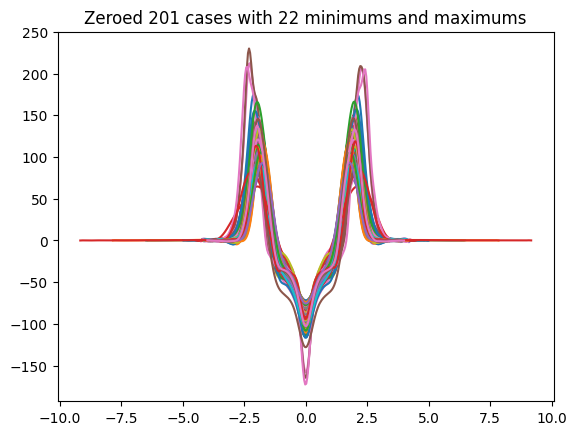

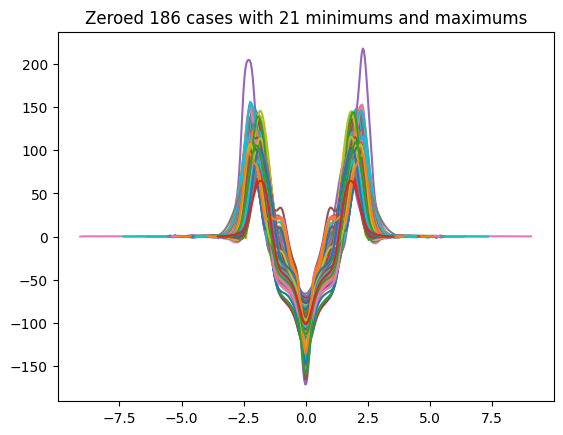

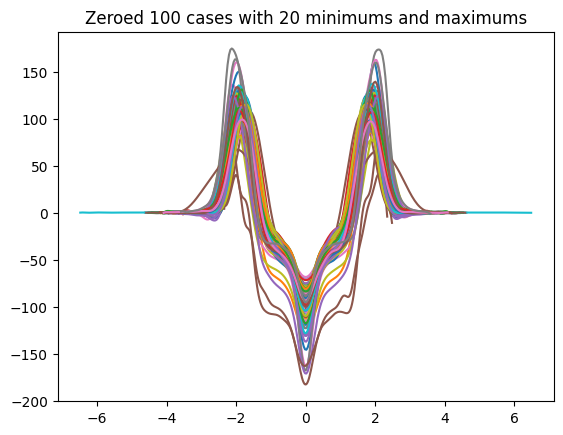

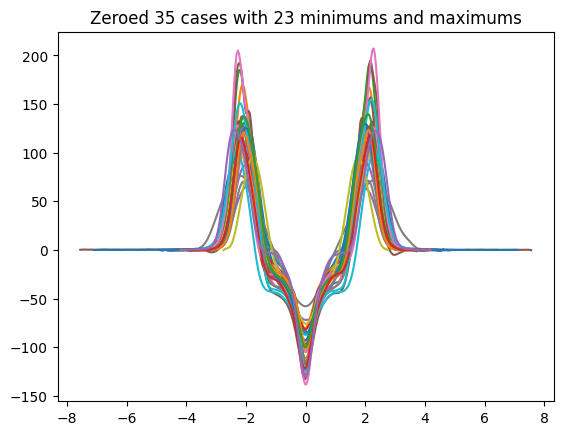

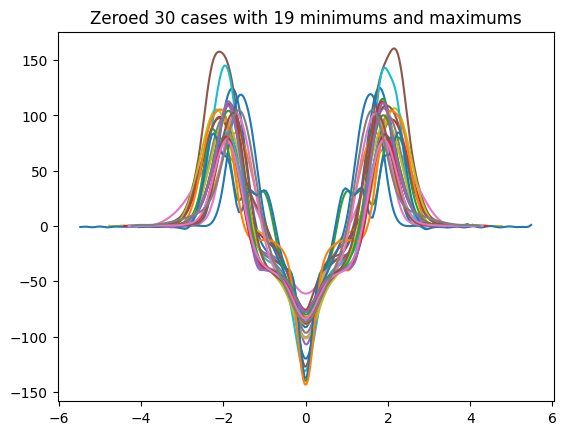

Removed outliers:[551, 89, 303, 353, 16, 82, 24, 387, 430, 311]


In [10]:
#print(Common_double_point_peak_FF.isna().sum(axis=0).value_counts())
freq = Common_double_point_peak_FF.isna().sum(axis=0).value_counts().values
n_nans = Common_double_point_peak_FF.isna().sum(axis=0)

found_outliers = []

for n in Common_double_point_peak_FF.isna().sum(axis=0).value_counts().index:
    col_names = n_nans[n_nans == n].index
    names = set()
    for column in col_names:
        names.add(int(column[:-1]))

    names = list(names)

    peak_FF_df = Common_peak_FF_df[names]
    peak_TD_x_df = Common_peak_TD_x_df[names]
    peak_TD_y_df = Common_peak_TD_y_df[names]
    
    outlier_column_indexes = set([])

    for column in peak_TD_y_df.columns:
        if peak_TD_y_df[column][99] > -1:
            outlier_column_indexes.add(column)
            found_outliers.append(column)
    
    if len(outlier_column_indexes) > 0:
        peak_FF_df = peak_FF_df.drop(outlier_column_indexes, axis=1)
        peak_TD_x_df = peak_TD_x_df.drop(outlier_column_indexes, axis=1)
        peak_TD_y_df = peak_TD_y_df.drop(outlier_column_indexes, axis=1)
        
        
        
    
    
    for column in peak_TD_x_df.columns:
        plt.plot(peak_TD_x_df[column],peak_TD_y_df[column])
        
    plt.title('Zeroed ' + str(len(names)) + ' cases with ' + str(23-n) + ' minimums and maximums')
    plt.show()
    
print('Removed outliers:' + str(found_outliers))

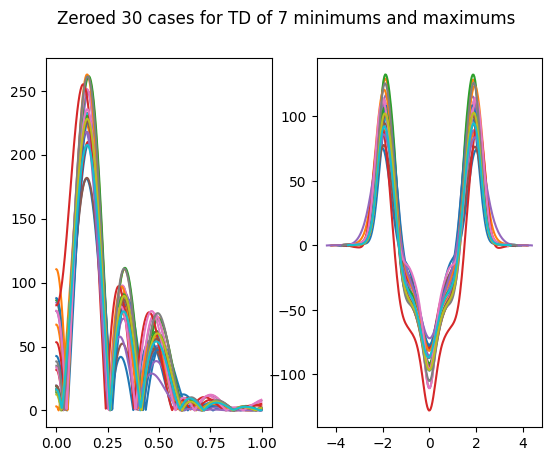

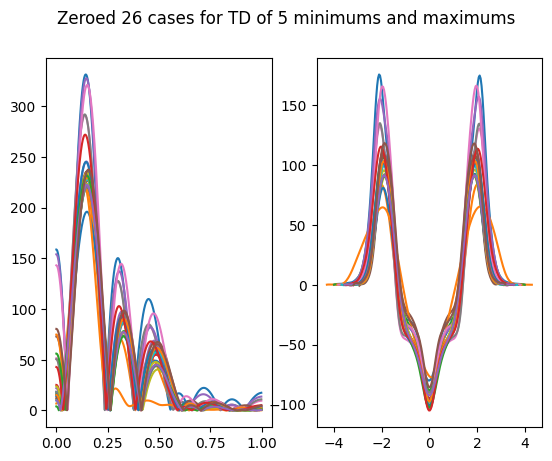

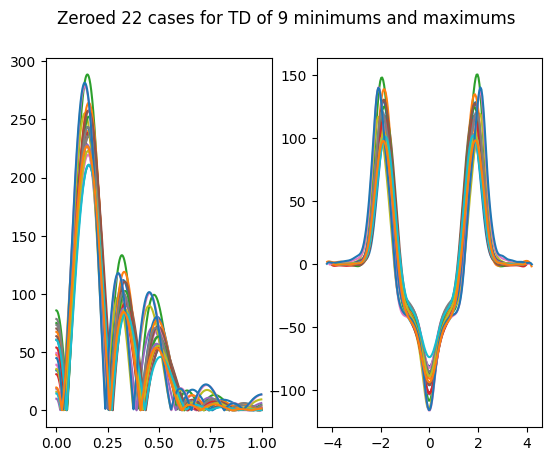

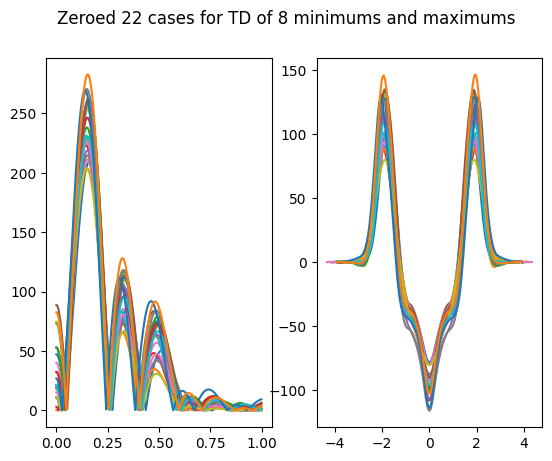

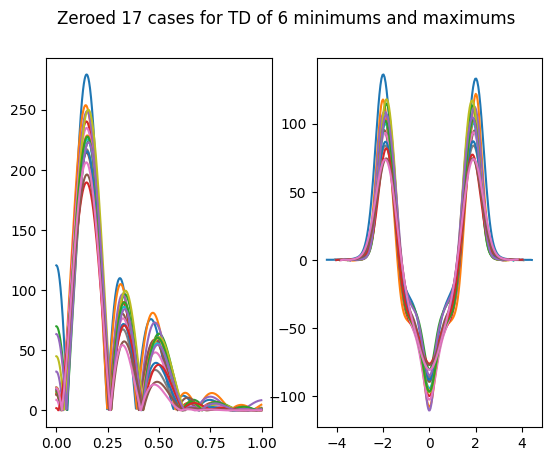

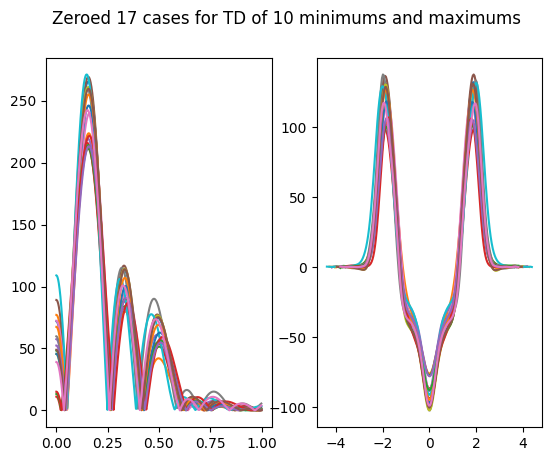

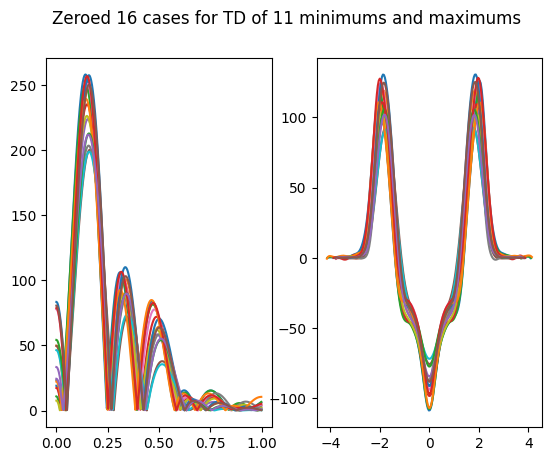

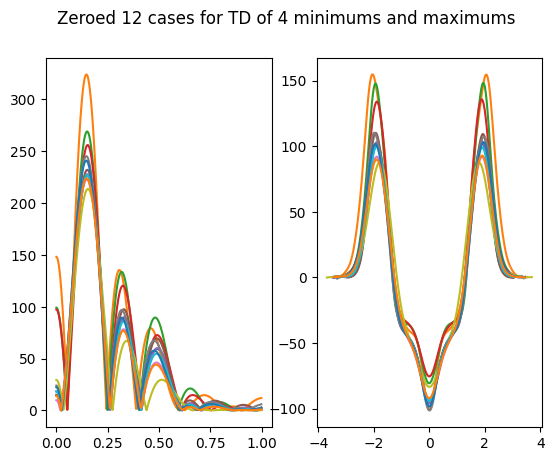

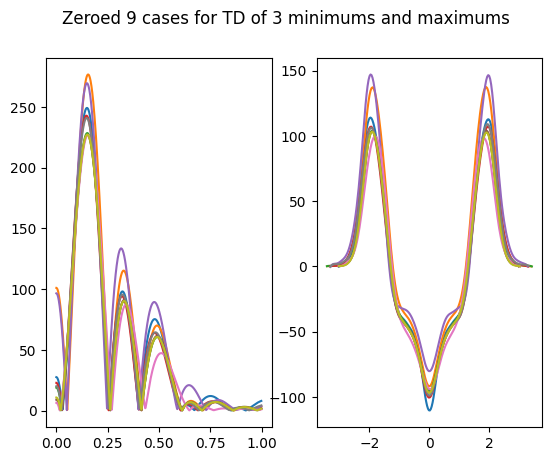

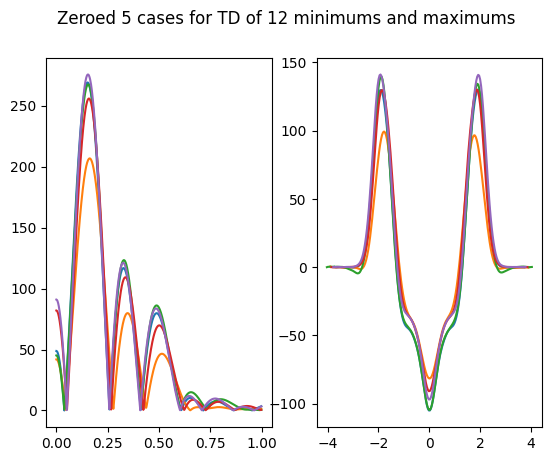

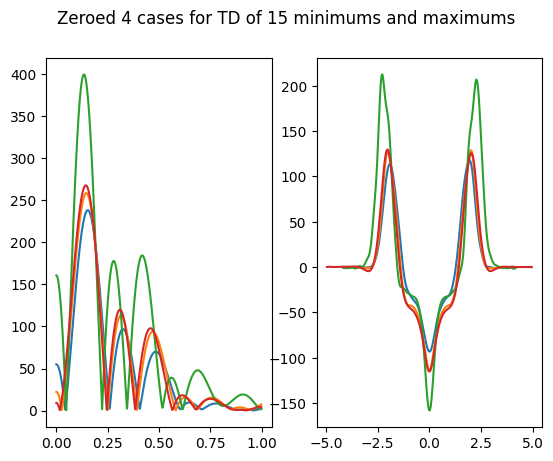

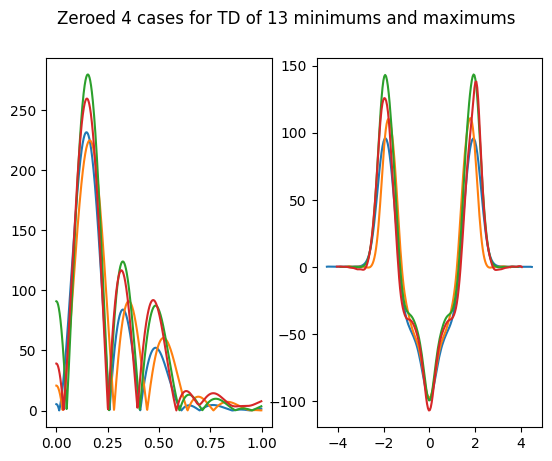

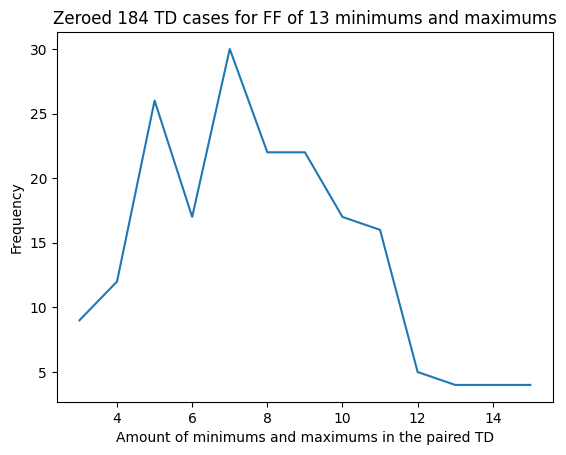

In [22]:
#print(Common_double_point_peak_FF.isna().sum(axis=0).value_counts())
freq = Common_double_point_peak_FF.isna().sum(axis=0).value_counts().values
n_nans = Common_double_point_peak_FF.isna().sum(axis=0)

found_outliers = []

n = 10

col_names = n_nans[n_nans == n].index
names = set()
for column in col_names:
    names.add(int(column[:-1]))

names = list(names)

peak_FF_df = Common_peak_FF_df[names]
peak_TD_x_df = Common_peak_TD_x_df[names]
peak_TD_y_df = Common_peak_TD_y_df[names]

outlier_column_indexes = set([])

for column in peak_TD_y_df.columns:
    if peak_TD_y_df[column][99] > -1:
        outlier_column_indexes.add(column)
        found_outliers.append(column)

if len(outlier_column_indexes) > 0:
    peak_FF_df = peak_FF_df.drop(outlier_column_indexes, axis=1)
    peak_TD_x_df = peak_TD_x_df.drop(outlier_column_indexes, axis=1)
    peak_TD_y_df = peak_TD_y_df.drop(outlier_column_indexes, axis=1)

peak_TD_columns = []
for index in peak_TD_y_df.columns:
    peak_TD_columns.append(str(index) + 'i')
    peak_TD_columns.append(str(index) + 'v')
    
temp_TD_peak = pd.DataFrame(index=range(31), columns=peak_TD_columns)
    
longest_case = 0
for index in peak_TD_y_df.columns:
    max_peaks_TD, _ = find_peaks(peak_TD_y_df[index])
    min_peaks_TD, _ = find_peaks(-peak_TD_y_df[index])

    TD_peak_index = np.hstack((max_peaks_TD, min_peaks_TD))
    TD_peak_index.sort()
    TD_peak_value = peak_TD_y_df[index][TD_peak_index]
        
    temp_TD_peak[str(index) + 'i'] = pd.Series(TD_peak_index)
    temp_TD_peak[str(index) + 'v'] = pd.Series(TD_peak_value.values)
    
#print(temp_TD_peak.isna().sum(axis=0).value_counts())
temp_freq = temp_TD_peak.isna().sum(axis=0).value_counts().values
temp_n_nans = temp_TD_peak.isna().sum(axis=0)
j = 0
length_list = []
freq_list = []
for temp_nan in temp_TD_peak.isna().sum(axis=0).value_counts().index:
    if temp_freq[j]/2 < 4:
        continue
        
    length_list.append(31-temp_nan)
    freq_list.append(temp_freq[j]/2)
    temp_cols = temp_n_nans[temp_n_nans == temp_nan].index  
    
    second_names = set()
    for index in temp_cols:
        second_names.add(int(index[:-1]))

    second_names = list(second_names)
    
    #print(peak_FF_df.columns)
    
    for index in second_names:
        #print(type(thing))
        plt.subplot(1, 2, 1)
        plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], peak_FF_df[index])
        plt.subplot(1, 2, 2)
        plt.plot(peak_TD_x_df[index],peak_TD_y_df[index])
        
    #print(temp_nan)
    plt.suptitle('Zeroed ' + str(len(second_names)) + ' cases for TD of ' + str(31-temp_nan) + ' minimums and maximums')
    plt.show()
    j = j + 1

length_list, freq_list= zip(*sorted(zip(length_list, freq_list)))    
    
plt.plot(length_list,freq_list)
plt.xlabel('Amount of minimums and maximums in the paired TD')
plt.ylabel('Frequency')
plt.title('Zeroed ' + str(int(sum(freq_list))) + ' TD cases for FF of ' + str(23-n) + ' minimums and maximums')
plt.show()
    
#print(31-temp_n_nans)
    
#print(temp_nan, temp_freq[j]/2)    
#temp_cols = temp_n_nans[temp_n_nans == n].index
    
#print(temp_TD_peak.isna().sum(axis=0).value_counts())
    
    #if longest_case < len(TD_peak_index):
    #   longest_case = len(TD_peak_index)
    
    #print(len(TD_peak_index))

#print(longest_case)
    
#TD_peak_df[str(index) + 'i'] = pd.Series(TD_peak_index)
#    TD_peak_df[str(index) + 'v'] = pd.Series(list(TD_peak_value))
#print(peak_FF_df.mean(axis=1))
#print(peak_FF_df.min(axis=1))
#print(peak_FF_df.max(axis=1))    
#print('')
#print(peak_TD_x_df.mean(axis=1))
#print(peak_TD_x_df.min(axis=1))
#print(peak_TD_x_df.max(axis=1))
#print('')
#print(peak_TD_y_df.mean(axis=1))
#print(peak_TD_y_df.min(axis=1))
#print(peak_TD_y_df.max(axis=1))



    
#for column in peak_TD_x_df.columns:
#    plt.subplot(1, 2, 1)
#    plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], peak_FF_df[column])
#    plt.subplot(1, 2, 2)
#    plt.plot(peak_TD_x_df[column],peak_TD_y_df[column])
    
#plt.suptitle('Zeroed ' + str(len(peak_FF_df.columns)) + ' cases for FF of ' + str(23-n) + ' minimums and maximums')
#plt.show()

#print('Removed outlier indexes:' + str(list(outlier_column_indexes)))

In [98]:
temp_TD_peak

,0i,0v,2i,2v,3i,3v,516i,516v,7i,7v,...,498i,498v,501i,501v,504i,504v,509i,509v,511i,511v
0,7.0,0.737144,5.0,0.000266,3.0,-0.132251,4.0,-0.005471,1.0,-0.057476,...,2.0,1.072083,43.0,130.432302,3.0,-0.223268,4.0,0.019829,19.0,-1.051330
1,8.0,0.735460,7.0,0.006642,8.0,0.011482,10.0,0.066064,4.0,-0.239621,...,6.0,0.132096,100.0,-91.309920,8.0,-0.045372,21.0,-1.045276,50.0,137.348803
2,47.0,175.701154,11.0,-0.034667,16.0,-0.655431,15.0,0.002150,40.0,108.657314,...,11.0,0.832825,156.0,128.525805,16.0,-0.403751,50.0,145.730173,100.0,-102.581711
3,99.0,-102.240965,48.0,131.189945,23.0,-0.190441,57.0,102.833812,99.0,-110.509980,...,15.0,0.613239,196.0,0.061090,23.0,-0.242779,100.0,-102.746455,149.0,133.126078
4,152.0,174.831971,100.0,-97.668144,30.0,-1.438984,99.0,-76.345438,159.0,112.257960,...,21.0,1.535517,198.0,0.119172,25.0,-0.254503,149.0,146.498871,173.0,-0.930677
5,NaN,NaN,151.0,131.890743,54.0,99.250049,142.0,103.942797,197.0,-0.575266,...,23.0,1.403968,NaN,NaN,54.0,92.877240,177.0,-1.069371,174.0,-0.910864
6,NaN,NaN,185.0,0.007656,100.0,-81.568852,182.0,-0.029075,NaN,NaN,...,46.0,113.396842,NaN,NaN,100.0,-75.572551,193.0,0.098980,180.0,-1.235219
7,NaN,NaN,189.0,0.029311,145.0,96.497863,187.0,0.110434,NaN,NaN,...,71.0,-36.852472,NaN,NaN,146.0,93.307126,196.0,0.010167,195.0,-0.147786
8,NaN,NaN,192.0,-0.005104,171.0,-1.193866,193.0,-0.112741,NaN,NaN,...,77.0,-33.169878,NaN,NaN,181.0,-0.463465,NaN,NaN,196.0,-0.152920
9,NaN,NaN,197.0,0.173847,179.0,-0.380752,197.0,0.102637,NaN,NaN,...,99.0,-94.270691,NaN,NaN,191.0,0.076103,NaN,NaN,198.0,-0.134949


In [76]:
print(peak_FF_df.mean(axis=1))
print(peak_FF_df.min(axis=1))
print(peak_FF_df.max(axis=1))
peak_FF_df

0      44.178921
1      44.147810
2      44.054492
3      43.899009
4      43.681432
         ...    
995     2.721379
996     2.766087
997     2.811289
998     2.856954
999     2.902847
Length: 1000, dtype: float64
0      0.567405
1      0.545555
2      0.480015
3      0.370815
4      0.218013
         ...   
995    0.029739
996    0.060821
997    0.035213
998    0.038433
999    0.078416
Length: 1000, dtype: float64
0      166.410447
1      166.330999
2      166.092700
3      165.695684
4      165.140176
          ...    
995     19.765528
996     19.788192
997     19.803455
998     19.811307
999     19.811746
Length: 1000, dtype: float64


,0,2,3,516,7,11,526,15,527,17,...,479,488,490,491,495,498,501,504,509,511
0,158.700313,71.950184,41.881901,77.099666,32.289559,97.286640,18.462586,51.497888,31.107958,15.608165,...,78.589195,77.862483,8.820765,46.322140,54.178274,20.005447,97.568510,49.612399,82.579273,59.816576
1,158.640037,71.915288,41.858587,77.069082,32.258483,97.248529,18.436181,51.453814,31.078497,15.581932,...,78.555300,77.827858,8.793017,46.298095,54.151827,19.978593,97.527724,49.588958,82.540544,59.781884
2,158.459238,71.810614,41.788653,76.977343,32.165269,97.134212,18.356976,51.321615,30.990126,15.503246,...,78.453630,77.723998,8.709786,46.225972,54.072497,19.898043,97.405385,49.518646,82.424375,59.677824
3,158.158008,71.636207,41.672126,76.824488,32.009958,96.943740,18.225007,51.101360,30.842886,15.372140,...,78.284230,77.550951,8.571111,46.105799,53.940315,19.763836,97.201548,49.401487,82.230815,59.504441
4,157.736499,71.392140,41.509050,76.610581,31.792620,96.677196,18.040330,50.793163,30.636840,15.188670,...,78.047171,77.308793,8.377055,45.937624,53.755336,19.576035,96.916307,49.237528,81.959946,59.261810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17.310329,1.627084,1.268836,0.132635,8.441597,0.752697,1.037683,9.554079,2.947654,1.385779,...,3.918295,6.807788,1.498769,0.220142,0.622816,9.698824,4.109445,0.695373,3.320094,5.025882
996,17.359571,1.696287,1.293176,0.154040,8.470322,0.792224,1.087064,9.577090,2.979131,1.458007,...,4.015900,6.824587,1.510190,0.221016,0.658939,9.885626,4.205689,0.699084,3.402738,5.175861
997,17.403357,1.765104,1.317745,0.175313,8.496613,0.832032,1.136088,9.596994,3.009537,1.529842,...,4.112148,6.839440,1.521161,0.222327,0.695136,10.068910,4.300574,0.703098,3.484723,5.324974
998,17.441690,1.833502,1.342507,0.196438,8.520465,0.872086,1.184733,9.613791,3.038860,1.601238,...,4.207004,6.852351,1.531680,0.224074,0.731382,10.248606,4.394067,0.707405,3.566017,5.473124


In [74]:
print(peak_TD_x_df.mean(axis=1))
print(peak_TD_x_df.min(axis=1))
print(peak_TD_x_df.max(axis=1))
peak_TD_x_df

0     -3.845019
1     -3.806376
2     -3.767732
3     -3.729089
4     -3.690445
         ...   
195    3.690445
196    3.729089
197    3.767732
198    3.806376
199    3.845019
Length: 200, dtype: float64
0     -9.171379
1     -9.079205
2     -8.987030
3     -8.894855
4     -8.802681
         ...   
195    2.825026
196    2.854607
197    2.884189
198    2.913770
199    2.943351
Length: 200, dtype: float64
0     -2.943351
1     -2.913770
2     -2.884189
3     -2.854607
4     -2.825026
         ...   
195    8.802681
196    8.894855
197    8.987030
198    9.079205
199    9.171379
Length: 200, dtype: float64


,0,2,3,516,7,11,526,15,527,17,...,479,488,490,491,495,498,501,504,509,511
0,-4.006749,-3.638160,-3.894873,-4.280508,-3.245228,-3.454279,-3.624405,-3.335005,-4.022265,-3.380774,...,-3.814311,-3.370672,-3.657461,-3.877105,-3.699422,-3.745707,-3.508037,-3.824368,-3.884358,-4.000169
1,-3.966481,-3.601596,-3.855728,-4.237488,-3.212612,-3.419563,-3.587979,-3.301487,-3.981840,-3.346796,...,-3.775976,-3.336796,-3.620703,-3.838139,-3.662242,-3.708062,-3.472781,-3.785932,-3.845319,-3.959967
2,-3.926212,-3.565031,-3.816584,-4.194468,-3.179997,-3.384846,-3.551553,-3.267970,-3.941416,-3.312819,...,-3.737641,-3.302920,-3.583944,-3.799173,-3.625062,-3.670417,-3.437524,-3.747497,-3.806280,-3.919764
3,-3.885943,-3.528467,-3.777440,-4.151448,-3.147382,-3.350130,-3.515127,-3.234452,-3.900991,-3.278841,...,-3.699306,-3.269044,-3.547186,-3.760208,-3.587882,-3.632772,-3.402268,-3.709061,-3.767241,-3.879561
4,-3.845674,-3.491902,-3.738295,-4.108428,-3.114766,-3.315413,-3.478700,-3.200934,-3.860566,-3.244863,...,-3.660972,-3.235168,-3.510427,-3.721242,-3.550702,-3.595126,-3.367011,-3.670625,-3.728203,-3.839359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.845674,3.491902,3.738295,4.108428,3.114766,3.315413,3.478700,3.200934,3.860566,3.244863,...,3.660972,3.235168,3.510427,3.721242,3.550702,3.595126,3.367011,3.670625,3.728203,3.839359
196,3.885943,3.528467,3.777440,4.151448,3.147382,3.350130,3.515127,3.234452,3.900991,3.278841,...,3.699306,3.269044,3.547186,3.760208,3.587882,3.632772,3.402268,3.709061,3.767241,3.879561
197,3.926212,3.565031,3.816584,4.194468,3.179997,3.384846,3.551553,3.267970,3.941416,3.312819,...,3.737641,3.302920,3.583944,3.799173,3.625062,3.670417,3.437524,3.747497,3.806280,3.919764
198,3.966481,3.601596,3.855728,4.237488,3.212612,3.419563,3.587979,3.301487,3.981840,3.346796,...,3.775976,3.336796,3.620703,3.838139,3.662242,3.708062,3.472781,3.785932,3.845319,3.959967


In [75]:
print(peak_TD_y_df.mean(axis=1))
print(peak_TD_y_df.min(axis=1))
print(peak_TD_y_df.max(axis=1))
peak_TD_y_df

0     -0.009578
1      0.114462
2      0.152007
3      0.157977
4      0.162063
         ...   
195    0.176064
196    0.177382
197    0.181166
198    0.148729
199    0.009628
Length: 200, dtype: float64
0     -1.005697
1     -1.115669
2     -1.361605
3     -1.422919
4     -1.369090
         ...   
195   -1.857042
196   -1.806936
197   -1.506363
198   -0.831783
199   -1.767729
Length: 200, dtype: float64
0      1.767609
1      2.057056
2      2.070130
3      1.923969
4      1.939757
         ...   
195    2.437852
196    2.092197
197    1.680162
198    1.293008
199    1.005552
Length: 200, dtype: float64


,0,2,3,516,7,11,526,15,527,17,...,479,488,490,491,495,498,501,504,509,511
0,-0.023756,0.184044,0.452611,0.103061,-0.061489,-0.326346,0.508252,-0.467031,-0.620068,-0.032214,...,0.031445,0.589174,0.138533,-0.049168,0.389196,-0.077216,-0.075050,0.191015,-0.125552,0.142232
1,0.338343,0.135833,0.118987,0.066439,-0.057476,0.217412,0.217381,-0.630751,-1.115669,0.029017,...,0.124921,0.885771,-0.034849,0.007145,0.607658,0.849552,0.116762,-0.057289,-0.069008,0.010168
2,0.503060,0.071331,-0.063603,0.029253,-0.146885,0.529635,0.015383,-0.683943,-1.361605,-0.008127,...,0.152524,1.021549,-0.142169,0.020618,0.593970,1.072083,0.171263,-0.184633,-0.032856,-0.129649
3,0.594123,0.024090,-0.132251,0.003772,-0.222967,0.688148,-0.103909,-0.585556,-1.422919,-0.071593,...,0.145868,1.049425,-0.189228,0.015873,0.459300,0.893481,0.178936,-0.223268,-0.001515,-0.225673
4,0.660462,0.002558,-0.125482,-0.005471,-0.239621,0.759929,-0.153479,-0.330952,-1.369090,-0.118260,...,0.129238,1.019097,-0.188157,0.009064,0.290638,0.566812,0.195750,-0.204648,0.019829,-0.273784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.550670,0.072997,-0.125113,-0.050043,-0.310954,0.517242,0.152977,-0.407852,-1.857042,-0.238118,...,0.244462,1.039422,-0.035123,-0.081496,0.501660,0.049190,0.086464,-0.110294,0.024502,-0.147786
196,0.501730,0.137529,-0.142183,0.031728,-0.500363,0.384739,0.170587,-0.750661,-1.773787,-0.279071,...,0.283136,0.858988,-0.026165,-0.041916,0.577446,0.147701,0.061090,-0.180394,0.010167,-0.152920
197,0.441431,0.173847,-0.195019,0.102637,-0.575266,0.271823,0.105295,-0.767754,-1.410615,-0.252662,...,0.285030,0.538564,-0.025016,0.009147,0.533616,0.332672,0.086274,-0.229434,0.043085,-0.150563
198,0.316270,0.105963,-0.293857,0.092472,-0.423065,0.229768,-0.099019,-0.374431,-0.650793,-0.147881,...,0.202206,0.059275,-0.051863,0.050555,0.257534,0.415199,0.119172,-0.238801,0.106834,-0.134949


In [216]:
peak_FF_df

,130,388,4,8,393,521,400,146,403,274,...,595,596,223,609,484,362,107,112,374,126
0,126.305057,148.223602,26.452318,35.088986,15.243243,2.832537,39.600236,14.534236,24.439155,72.469591,...,173.344010,9.117910,37.651936,23.179887,89.977108,94.298826,70.401790,112.369212,20.350168,110.302818
1,126.258295,148.166059,26.419103,35.045804,15.202964,2.855031,39.556225,14.511215,24.401505,72.432179,...,173.273282,9.086906,37.630025,23.152669,89.917819,94.256405,70.364698,112.321799,20.313695,110.243639
2,126.118030,147.993459,26.319475,34.916287,15.082147,2.922499,39.424218,14.442163,24.288575,72.319961,...,173.061135,8.993911,37.564300,23.071029,89.739988,94.129163,70.253438,112.179583,20.204301,110.066138
3,125.884331,147.705890,26.153484,34.700512,14.880854,3.034903,39.204293,14.327114,24.100428,72.132990,...,172.707686,8.838969,37.454785,22.935006,89.443713,93.917165,70.068065,111.942633,20.022055,109.770422
4,125.557310,147.303496,25.921215,34.398613,14.599193,3.192179,38.896578,14.166125,23.837166,71.871356,...,172.213124,8.622159,37.301522,22.744663,89.029164,93.620519,69.808668,111.611064,19.767073,109.356670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.128078,16.979623,6.549238,13.180741,10.153717,0.331124,8.651502,4.115626,12.122262,13.524043,...,20.044393,10.143258,1.934677,10.944315,14.226207,3.708209,13.267804,8.828687,11.583530,0.821586
996,2.129942,16.981651,6.484021,12.958096,10.158079,0.326775,8.390566,4.111134,11.943324,13.506484,...,19.478108,10.139295,1.928510,10.943840,14.060901,3.710614,13.267244,8.780958,11.501604,0.733576
997,2.130985,16.978307,6.417372,12.733305,10.159454,0.324814,8.130331,4.105555,11.762296,13.484403,...,18.908518,10.132195,1.921585,10.938560,13.892994,3.711757,13.262215,8.730845,11.416531,0.643720
998,2.131211,16.969611,6.349330,12.506490,10.157844,0.325273,7.870919,4.098898,11.579273,13.457824,...,18.335917,10.121970,1.913911,10.928482,13.722547,3.711649,13.252734,8.678382,11.328362,0.552090


In [215]:
peak_TD_x_df

,130,388,4,8,393,521,400,146,403,274,...,595,596,223,609,484,362,107,112,374,126
0,-4.395169,-3.961981,-3.844019,-4.062528,-7.558520,-4.427690,-3.940409,-4.046362,-3.982106,-4.164189,...,-4.230590,-3.698065,-2.755741,-3.773735,-3.692449,-7.096597,-4.166353,-3.586429,-3.979194,-4.139800
1,-4.350997,-3.922162,-3.805385,-4.021698,-7.482555,-4.383190,-3.900807,-4.005695,-3.942085,-4.122338,...,-4.188072,-3.660898,-2.728045,-3.735808,-3.655339,-7.025274,-4.124480,-3.550385,-3.939202,-4.098194
2,-4.306824,-3.882343,-3.766752,-3.980869,-7.406590,-4.338691,-3.861205,-3.965028,-3.902064,-4.080487,...,-4.145553,-3.623732,-2.700349,-3.697881,-3.618229,-6.953951,-4.082607,-3.514340,-3.899210,-4.056588
3,-4.262652,-3.842525,-3.728119,-3.940039,-7.330625,-4.294191,-3.821603,-3.924361,-3.862043,-4.038635,...,-4.103035,-3.586565,-2.672653,-3.659954,-3.581119,-6.882629,-4.040735,-3.478296,-3.859218,-4.014982
4,-4.218479,-3.802706,-3.689485,-3.899210,-7.254660,-4.249692,-3.782001,-3.883694,-3.822022,-3.996784,...,-4.060516,-3.549399,-2.644958,-3.622027,-3.544009,-6.811306,-3.998862,-3.442251,-3.819226,-3.973376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4.218479,3.802706,3.689485,3.899210,7.254660,4.249692,3.782001,3.883694,3.822022,3.996784,...,4.060516,3.549399,2.644958,3.622027,3.544009,6.811306,3.998862,3.442251,3.819226,3.973376
196,4.262652,3.842525,3.728119,3.940039,7.330625,4.294191,3.821603,3.924361,3.862043,4.038635,...,4.103035,3.586565,2.672653,3.659954,3.581119,6.882629,4.040735,3.478296,3.859218,4.014982
197,4.306824,3.882343,3.766752,3.980869,7.406590,4.338691,3.861205,3.965028,3.902064,4.080487,...,4.145553,3.623732,2.700349,3.697881,3.618229,6.953951,4.082607,3.514340,3.899210,4.056588
198,4.350997,3.922162,3.805385,4.021698,7.482555,4.383190,3.900807,4.005695,3.942085,4.122338,...,4.188072,3.660898,2.728045,3.735808,3.655339,7.025274,4.124480,3.550385,3.939202,4.098194


In [218]:
peak_TD_y_df

,130,388,4,8,393,521,400,146,403,274,...,595,596,223,609,484,362,107,112,374,126
0,-0.075312,0.253612,-0.253962,0.122229,0.209737,0.129061,-0.039322,0.115024,-0.186420,-0.050478,...,0.154029,1.348504,-0.096467,0.399594,-0.193301,-0.055571,0.065095,-0.068943,0.118123,-0.322378
1,-0.136028,0.165547,0.187027,0.174158,0.448526,0.126980,0.328704,-0.013626,0.124740,0.020559,...,-0.039849,0.204997,0.570324,0.925368,0.223020,0.034440,0.002794,0.016327,-0.474630,0.141126
2,-0.143428,0.076223,0.344321,0.333778,0.368169,0.092861,0.269759,-0.100212,0.137471,0.006115,...,-0.139761,-0.180727,0.995505,0.784910,0.480677,0.058763,-0.005085,0.056448,-0.684307,0.257927
3,-0.106505,0.042602,0.342878,0.469346,0.352047,0.071916,0.153356,-0.142027,0.059518,-0.034628,...,-0.094918,-0.126562,1.277325,0.445759,0.661101,0.101472,0.018343,0.072169,-0.657014,0.219935
4,-0.047095,0.068076,0.270566,0.524212,0.394617,0.073169,0.147618,-0.147330,-0.005677,-0.066068,...,-0.004447,0.106339,1.514742,0.188676,0.817441,0.158740,0.046022,0.080800,-0.534762,0.155372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.054787,0.068912,0.187838,0.474389,0.170851,0.116248,0.071537,-0.138768,-0.098700,-0.030756,...,-0.493987,0.462246,1.358411,1.045313,0.834404,-0.043372,0.018208,0.104805,-0.368303,0.258505
196,0.050253,0.088344,0.237024,0.370903,0.162896,0.047967,0.083249,-0.139111,-0.219305,-0.070817,...,-0.468323,0.378450,0.921622,1.034337,0.628850,-0.015983,0.052509,0.099796,-0.499913,0.116436
197,0.057050,0.096139,0.296144,0.215402,0.235597,-0.030283,0.158245,-0.145500,-0.252015,-0.053936,...,-0.112685,0.097526,0.606783,0.858783,0.419749,0.119618,0.099990,0.079314,-0.597502,-0.002304
198,0.071672,0.018207,0.326262,0.032497,0.253567,-0.095241,0.198783,-0.146460,-0.120259,0.011761,...,0.255059,-0.453956,0.354052,0.428252,0.253324,0.251386,0.102183,0.057851,-0.522339,0.024498


In [ ]:
for column in peak_TD_x_df.columns:
    #    plt.plot(peak_TD_x_df[column],peak_TD_y_df[column])

In [113]:
FF_peak_df

,0i,0v,1i,1v,2i,2v,3i,3v,4i,4v,...,608i,608v,609i,609v,610i,610v,611i,611v,612i,612v
0,55.0,1.642677,29.0,0.230294,47.0,0.634862,44.0,0.617265,29.0,0.505949,...,54.0,0.372514,30.0,0.473393,30.0,0.293642,48.0,0.765778,45.0,0.526478
1,143.0,331.330438,149.0,231.824996,155.0,265.186571,162.0,206.696496,140.0,237.803138,...,147.0,279.206894,144.0,207.517433,151.0,222.518145,143.0,217.776912,170.0,232.662970
2,237.0,1.892465,260.0,0.560469,262.0,1.491681,278.0,1.383059,245.0,0.582451,...,248.0,1.053632,247.0,2.223680,262.0,3.511012,252.0,1.276767,296.0,0.752603
3,300.0,150.251758,328.0,91.700922,331.0,113.449338,347.0,79.833498,301.0,76.967218,...,310.0,109.945567,313.0,94.706592,330.0,88.081391,309.0,57.761874,368.0,80.615339
4,377.0,1.226568,414.0,1.599710,417.0,0.516610,437.0,2.226908,366.0,0.852871,...,388.0,1.484522,390.0,6.102914,413.0,6.194779,393.0,2.400687,460.0,0.545327
5,449.0,109.910837,497.0,67.440547,494.0,74.661154,515.0,46.521243,445.0,83.615978,...,461.0,75.948629,467.0,80.839946,493.0,64.524031,465.0,28.881169,544.0,53.867489
6,556.0,0.825910,623.0,0.096372,616.0,0.313041,653.0,0.206025,555.0,0.101388,...,572.0,1.208470,570.0,4.795210,618.0,1.954699,617.0,0.197200,690.0,0.034209
7,597.0,16.951412,678.0,11.282299,660.0,8.976489,689.0,2.730664,597.0,12.843224,...,618.0,12.319759,618.0,19.371972,660.0,7.392035,653.0,1.181773,713.0,1.678701
8,648.0,0.506061,759.0,0.277671,720.0,0.093960,734.0,1.647486,653.0,0.155234,...,682.0,0.403518,680.0,3.915188,713.0,2.637676,709.0,0.262701,739.0,0.173133
9,719.0,22.313741,849.0,8.503053,785.0,7.255117,791.0,2.777661,720.0,13.395769,...,747.0,8.845803,746.0,17.987158,784.0,8.810435,762.0,0.761384,840.0,11.766618


In [165]:
for i in Common_peak_TD_y_df.columns:
    Common_peak_TD_y_df[i] = Common_peak_TD_y_df[i]-round((Common_peak_TD_y_df[i][0]+Common_peak_TD_y_df[i][199])/2,3)

freq = Common_double_point_peak_FF.isna().sum(axis=0).value_counts().values
n_nans = Common_double_point_peak_FF.isna().sum(axis=0)
i = 0
for nans in Common_double_point_peak_FF.isna().sum(axis=0).value_counts().index:
    col_names = n_nans[n_nans == nans].index
    
    names = set()
    for column in FF_peak_filtered.columns:
        if int(column[:-1]) in sample_simulations:
            names.add(int(column[:-1]))
    
    names = list(names)
    
    peak_FF_df = FF_df[names]
    peak_TD_x_df = TD_x_df[names]
    peak_TD_y_df = TD_y_df[names]
    
    i = i + 1

#print(nans,freq[i]/2)
#n_nans = Common_double_point_peak_FF.isna().sum(axis=0)
#col_names = n_nans[n_nans == 0].index

C:\Users\niila\AppData\Local\Temp\ipykernel_16708\3010620974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Common_peak_TD_y_df[i] = Common_peak_TD_y_df[i]-round((Common_peak_TD_y_df[i][0]+Common_peak_TD_y_df[i][199])/2,3)


In [114]:
TD_peak_df

,0i,0v,1i,1v,2i,2v,3i,3v,4i,4v,...,608i,608v,609i,609v,610i,610v,611i,611v,612i,612v
0,7.0,333.965144,4.0,333.739810,5.0,340.114266,3.0,334.099749,2.0,333.446321,...,3.0,330.455435,1.0,329.448368,4.0,331.378835,3.0,329.813347,3.0,326.721055
1,8.0,333.963460,9.0,334.148632,7.0,340.120642,8.0,334.243482,8.0,333.168206,...,55.0,466.446918,5.0,328.639383,10.0,331.093432,6.0,329.780676,9.0,324.959103
2,47.0,508.929154,15.0,333.711850,11.0,340.079333,16.0,333.576569,45.0,435.579064,...,100.0,242.477164,16.0,329.914008,16.0,331.384300,53.0,415.827552,18.0,326.820946
3,99.0,230.987035,56.0,442.551943,48.0,471.303945,23.0,334.041559,99.0,221.933150,...,145.0,463.403600,21.0,329.289711,19.0,331.302602,100.0,257.674756,22.0,326.484942
4,152.0,508.059971,99.0,235.533814,100.0,242.445856,30.0,332.793016,154.0,435.988620,...,193.0,330.419034,26.0,331.437136,53.0,430.938614,146.0,413.414522,51.0,439.799226
5,NaN,NaN,144.0,445.928452,151.0,472.004743,54.0,433.482049,193.0,333.262786,...,197.0,330.465254,30.0,330.490625,99.0,235.148768,193.0,329.761805,99.0,217.757346
6,NaN,NaN,183.0,333.686445,185.0,340.121656,100.0,252.663148,198.0,333.428262,...,NaN,NaN,45.0,437.751895,147.0,441.307983,197.0,329.805961,148.0,439.516370
7,NaN,NaN,188.0,334.041065,189.0,340.143311,145.0,430.729863,NaN,NaN,...,NaN,NaN,100.0,241.927876,168.0,332.017886,NaN,NaN,179.0,326.382972
8,NaN,NaN,193.0,333.677581,192.0,340.108896,171.0,333.038134,NaN,NaN,...,NaN,NaN,121.0,294.008711,171.0,332.421795,NaN,NaN,183.0,326.456213
9,NaN,NaN,197.0,333.876643,197.0,340.287847,179.0,333.851248,NaN,NaN,...,NaN,NaN,124.0,292.857946,178.0,331.162331,NaN,NaN,192.0,325.436475


In [ ]:
Common_double_point_peak_FF.value_counts()

In [145]:
#for sample_nan in sample_nans:
    #col_names = n_nans[n_nans == sample_nan].index
    #FF_peak_filtered = FF_peak_df[col_names]
    
    #print(FF_peak_filtered.columns)
    
    #names = set()
    #for column in FF_peak_filtered.columns:
    #    if int(column[:-1]) in sample_simulations:
    #        names.add(int(column[:-1]))
    
    #names = list(names)
    #print(names)
    #print(len(names))
    #peak_FF = FF_peak_df[names]
    #peak_TD_x = Common_peak_TD_x_df[names]
    #peak_TD_y = Common_peak_TD_y_df[names]
    #print(peak_FF)


#names = []
#for index in Common_peak_FF_df.columns:
#    names.append(str(index) + 'i')
#    names.append(str(index) + 'v')

#FF_peak_df = pd.DataFrame(index=range(23), columns=names)
#TD_peak_df = pd.DataFrame(index=range(41), columns=names)

#FF_largest_amount = 0
#TD_largest_amount = 0

#for index in Common_peak_FF_df.columns:
#    max_peaks_FF, _ = find_peaks(Common_peak_FF_df[index])
#    min_peaks_FF, _ = find_peaks(-Common_peak_FF_df[index])
    
#    FF_peak_index = np.hstack((max_peaks_FF, min_peaks_FF))
#    FF_peak_index.sort()
#    FF_peak_value = Common_peak_FF_df[index][FF_peak_index]
    
#    if FF_largest_amount < len(FF_peak_index):
#        FF_largest_amount = len(FF_peak_index)
    
#    FF_peak_df[str(index) + 'i'] = pd.Series(FF_peak_index)
#    FF_peak_df[str(index) + 'v'] = pd.Series(list(FF_peak_value))
    
#    max_peaks_TD, _ = find_peaks(Common_peak_TD_y_df[index])
#    min_peaks_TD, _ = find_peaks(-Common_peak_TD_y_df[index])
    
#    TD_peak_index = np.hstack((max_peaks_TD, min_peaks_TD))
#    TD_peak_index.sort()
#    TD_peak_value = Common_peak_TD_y_df[index][TD_peak_index]
    
#    if TD_largest_amount < len(TD_peak_index):
#        TD_largest_amount = len(TD_peak_index)
    
#    TD_peak_df[str(index) + 'i'] = pd.Series(TD_peak_index)
#    TD_peak_df[str(index) + 'v'] = pd.Series(list(TD_peak_value))
    
#print(FF_largest_amount)
#print(TD_largest_amount)

#for i in Common_peak_TD_y_df.columns:
#    Common_peak_TD_y_df[i] = Common_peak_TD_y_df[i]-round((Common_peak_TD_y_df[i][0]+Common_peak_TD_y_df[i][199])/2,3)
    
    

#print(type(sample_simulations[0]))
    
#n_nans = FF_peak_df.isna().sum(axis=0)
#for sample_nan in sample_nans:
    #col_names = n_nans[n_nans == sample_nan].index
    #FF_peak_filtered = FF_peak_df[col_names]
    
    #print(FF_peak_filtered.columns)
    
    #names = set()
    #for column in FF_peak_filtered.columns:
    #    if int(column[:-1]) in sample_simulations:
    #        names.add(int(column[:-1]))
    
    #names = list(names)
    #print(names)
    #print(len(names))
    #peak_FF = FF_peak_df[names]
    #peak_TD_x = Common_peak_TD_x_df[names]
    #peak_TD_y = Common_peak_TD_y_df[names]
    #print(peak_FF)
    
    
    
    
    
      
    
    
    #print(names)
    
    #print(Common_peak_TD_y_df.columns)
    
    #for i in names:
    #    Common_peak_TD_y_df[i] = Common_peak_TD_y_df[i]-round((Common_peak_TD_y_df[i][0]+Common_peak_TD_y_df[i][199])/2,3)
    
#Common_peak_TD_y_df
    
    
#for i in range(0,613):
#    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)
    
#n_nans = FF_peak_df.isna().sum(axis=0)
#col_names = n_nans[n_nans == 0].index
#FF_peak_filtered = FF_peak_df[col_names]
#TD_peak_filtered = TD_peak_df[col_names]

C:\Users\niila\AppData\Local\Temp\ipykernel_16708\504427279.py:37: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  TD_peak_df[str(index) + 'v'] = pd.Series(list(TD_peak_value))


14
39


In [34]:
import collections

n_nans = FF_peak_df.isna().sum(axis=0)
FF_peak_amounts = FF_peak_df.isna().sum(axis=0).value_counts().values
i = 0 
instance_list = []
for nan_amount in FF_peak_df.isna().sum(axis=0).value_counts().index:
    #print(23-nan_amount,FF_peak_amounts[i]/2)
    for amount in range(0,int(FF_peak_amounts[i]/2),1):
        instance_list.append(23-nan_amount)
    i = i + 1
instance_list.sort()
#print(np.quantile(instance_list, 0.80))
sample_peak_amounts = collections.Counter(instance_list[:490])
print(sample_peak_amounts)

Counter({12: 198, 13: 131, 11: 101, 10: 34, 8: 13, 9: 11, 7: 2})


In [39]:
filtered = pd.Dataframe()

for key in sample_peak_amounts:
    n_nans = FF_peak_df.isna().sum(axis=0)
    col_names = n_nans[n_nans == 23-key].index
    FF_peak_filtered = FF_peak_df[col_names]
    TD_peak_filtered = TD_peak_df[col_names]
    
    sample = random.sample(list(FF_peak_filtered.columns),sample_peak_amounts[key]*2)
    print(sample)
    
    
    #print(FF_peak_filtered)
    #print(sample_peak_amounts[key])

['37v', '37i', '101i', '101v']
['482i', '271i', '338i', '98v', '455i', '87i', '604i', '98i', '338v', '579i', '78v', '114i', '524v', '308i', '455v', '259v', '604v', '259i', '78i', '482v', '114v', '271v', '308v', '524i', '87v', '579v']
['355i', '380v', '133v', '221i', '356i', '337v', '583i', '221v', '222i', '207v', '583v', '359i', '380i', '207i', '364i', '359v', '337i', '133i', '355v', '356v', '364v', '222v']
['311i', '368i', '375i', '286v', '347v', '486v', '347i', '606i', '453i', '541i', '540v', '307v', '570i', '25v', '492v', '183i', '123i', '426i', '569i', '541v', '430v', '138v', '486i', '375v', '435i', '58v', '576i', '131i', '334v', '311v', '416i', '25i', '363i', '272v', '57i', '138i', '556v', '131v', '272i', '453v', '286i', '570v', '440v', '183v', '307i', '582v', '556i', '426v', '266i', '582i', '569v', '576v', '540i', '606v', '123v', '193v', '58i', '416v', '435v', '440i', '193i', '57v', '368v', '363v', '334i', '492i', '430i', '266v']
['212i', '408i', '39i', '233v', '480i', '553v', '4